# Modelling and simulating COVID-19

<p class="pm-node nj-authors">Marc Sturrock, RCSI [marcsturrock@rcsi.com]</p>

At the beginning of pandemic with a limited amount of data and knowledge of the transmission mechanisms behind COVID-19, various mathematical models from the scientific community, mathematical biologists, and epidemiologists were used in gauging how the pandemic would likely develop. 

In this interactive session, we will discuss and simulate the most basic mathematical model of an infectious disease: the SIR model, and we will also use the model to estimate the basic reproductive number. We estimate the $R_0$ to be  **4.90 (95% CI 4.67294, 5.13887) in the US,** which agrees with the most recent study 
based on early data from Wuhan, China whose estimates sets $R_0$ median value at 5.7 (95% CI 3.8–8.9) (Sanche, Lin, Xu, Romero-Severson, Hengartner and Ke 2020)**.**  

Here is what is covered in this session:

- [x] SIR model description 
- [x] Solve SIR ODEs
- [x] Estimating $R_0$
- [x] General use of this model

# Model Description: SIR MODEL 

In the field of mathematical modelling of infectious diseases, models can be of two different types: stochastic (probabilistic) and deterministic. Stochastic models tend to be more complicated to analyse than deterministic models, but they also tend to be more accurate/realistic. We will examine a deterministic SIR model using ordinary differential equations. 

## Compartments of SIR model 

The SIR model, originating in the 1900s, classifies a fixed population into three compartments at a given time: S(t) (susceptible group), I(t) (infected group), and R(t) (Removed) (Kermack and  McKendrick  1927). 

* S(t): From a fixed population, this group counts the number of people who are susceptible to being infected at the time t. 
* I(t): The number of people who are currently infectious at time t. (i.e. people who can infect other people).
* R(t): people who are no longer infectious at time t, either because they have recovered or died.  

In this model, the population moves from being susceptible to infected and from infected to removed.  $S(t) \rightarrow I(t) \rightarrow R(t)$

To transition from the S to I compartment, an effective contact between an infected person and an infectious person must take place. **Effective contact** is defined as an interaction between a susceptible person and an infectious person that results in the susceptible person becoming infected.  The effective contact rate per infectious person, $\sigma$, is defined as the average number of people that an infected patient can infect per unit time. This can be computed from the transmission risk, **p**, the probability of infecting a susceptible person with whom an infected patient is in contact, and the number of total contacts with susceptible people, $\tau$. 

$$
\tau = \frac {\eta S}{N} \;(eq.1)
$$
where $\eta$ is the average number of people that a person comes in contact with per unit time and N is the population size. Then we can write the effective contact rate as

$$
\sigma = \tau * p \;(eq.2)
$$
$$
\sigma = \frac{\eta S}{N}* p \;(eq.3)
$$
Let's define $\beta$, the number of people infected by an infectious person given that all people in their contact are susceptible. 

$$
\beta = \eta * p \;(eq.4)
$$
(i.e. we substitute (eq.4) into (eq.3) to find (eq.5))

Transitioning from the I to R compartments, let $\gamma
$ be the probability that a person may recover at a time t.  

## Mathematical description of the model

Here is the mathematical expression of the model in the ordinary differential equation (ODE) form. 

$$
$$
$$
\frac{dS(t)}{dt}  = - \beta \frac{S(t) I(t)}{N} \;\;\; (eq.5)\\
$$
$$
\frac{dI(t)}{dt}  =  \beta  \frac{S(t) I(t)}{N} - \gamma I(t) \;\;\; (eq.6) \\
$$
$$
\frac{dR(t)}{dt}  = \gamma I(t) \; \; \; (eq.7)
$$
## The basic reproductive number 

In this session, we focus on the ratio of $\beta$ to $\gamma$ which is known as the **basic reproductive number,** $R_0$, defined as the **expected number** of cases directly generated by one case in a population where all individuals are susceptible to infection. This ratio is useful to determine if the virus will become an epidemic or not. When $R_0$ > 1, each existing infection causes more than one new infection. The disease will be transmitted between people, and there may be an outbreak or epidemic. If $R_0$ = 1, each existing infection causes one new infection. The disease will stay alive and stable, but there won’t be an outbreak or an epidemic. If $R_0$ < 1, each existing infection causes less than one new infection. In this case, the disease will decline and eventually die out.


## Assumptions 

As already implied in the equations, there are various assumptions taken into account. First, the probability of contracting the disease or recovering from it is the same for everyone. Second, we have a fixed population. In the case of a pandemic that would mean that there are no births or deaths and that the net international migrant is zero. (The veracity of these assumptions are revisited in section 4.)

$$
N = I(t) + S(t) + R(t) \; (eq.8)
$$
# Solving SIR ODE model in Julia

The differential equations describing the model can be simulated using various numerical methods, the most basic being the Euler method. However, in this case, we will solve the ODE system using the package DifferentialEquations.jl , a well-optimized package in Julia built in consultation with the most recent techniques in the research of numerical analysis. ([Julia benchmarks better than most single-purpose languages.](https://julialang.org/benchmarks/) )

To reduce the number of variables in the model and to avoid estimating the population, we set the ratio $\frac{\beta}{N}$ to just $\beta$.

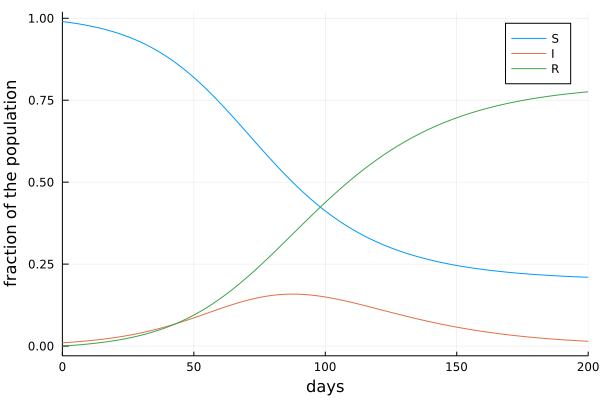

In [287]:
using Plots
using OrdinaryDiffEq;

# define the parameters:
function sir_ode!(δu, u, p,  t)
    
    # unpack variables and parameters:
    S, I, R = u
    β, γ = p   
    
    # define differential equations:
    δS = -β*S*I
    δI = +β*S*I - γ*I
    δR = +γ*I
    
    δu .= (δS, δI, δR)   # copy the values into the vector du; note the `.`
  	δu
end

# define the paramaters:
β = 0.1
γ = 0.05
parameters = [β, γ]

# define the initital values as percentage of population:
S₀ = 0.99 
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

#solution:
solution = solve(problem, saveat = 0.1);

#plot:
plot(solution, label=["S" "I" "R"], Title = "SIR Model Evolution", ylabel = "fraction of the population", xlabel = "days")

Try playing with the parameters in the cell below and solving the system/plotting it again this time using an area plot, try to get a feel for how the parameter affect the dynamics. For example:

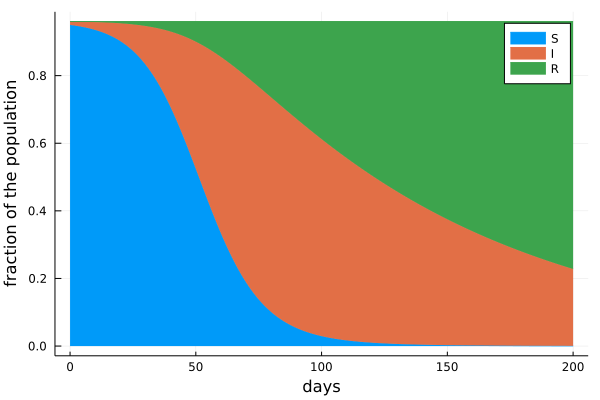

In [288]:
β = 0.1
γ = 0.01
parameters = [β, γ]

# define the initital values as percentage of population:
S₀ = 0.95
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

#solution:
solution = solve(problem, saveat = 0.1);

#plot:
areaplot(solution.t,solution', label=["S" "I" "R"], Title = "SIR Model Evolution", ylabel = "fraction of the population", xlabel = "days")


- What happens if you increase the length of time simulated for?
- What happens if $\beta = \gamma$?
- What happens if $\beta > \gamma$?
- What happens if $\beta < \gamma$?

With parameters chosen such that $\frac{\beta}{N} = 0.1 \; \And \; \gamma = 0.05$, from our experiment when we start with the scenario with 0.01 people are infectious, we find that the infection will pick at 18% of the population. This case does not reflect COVID-19. (The interpretation is visited in Section 4).

# Fitting the model 

Models can be useful in estimating some key characteristics of an epidemic. It can estimate the recovery rate ($\gamma$) and the number of people infected by an infectious person given that all people in his/her contact are susceptible ($\beta$). Here, we focus on estimating $R_0$.

## Methodology

We use the analytical solution to our ODEs and estimate the dependent variable using a non-linear least squares concept. 

For non-linear least squares, the most common method is **the Levenberg-Marquardt algorithm**, (**LMA** ), also known as the **Damped least-squares** (**DLS**) method. It interpolates between the Gauss-Newton algorithm and gradient descent for efficiency (Gavin 2019). This article uses its implementation in Julia, but it is very popular and available in most programming languages. 

## Data Manipulation 

We use the data from the Center for Systems Science and Engineering, John Hopkins' Whiting School of Engineering. We will focus on one country, the US. This data is not the most accurate, but the errors in the data are mainly due to external factors, such as lack of testing for those exposed. 

As part of the model's assumptions, we fix the population of the US at 329,686,270, as of May 2020.  Note that the US Census estimates about one birth every 8 seconds and one death every 12 seconds. However, we ignore these rates. More complicated, and possibly accurate, models take them into account.

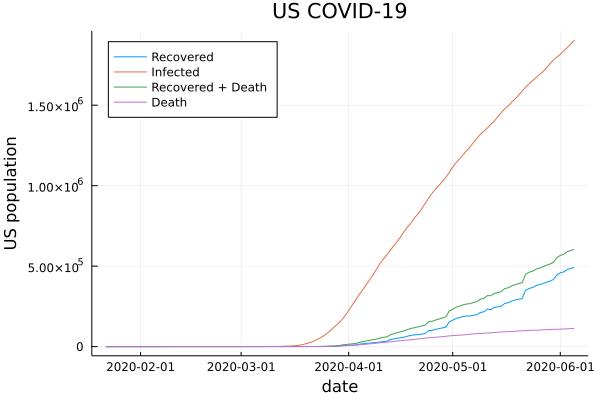

In [289]:
using DataFrames
using Dates
using CSV
using HTTP

# download the data, read, clean and view the data:
data_confirmed_cases = DataFrame(CSV.File(HTTP.get("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").body));
data_death = DataFrame(CSV.File(HTTP.get("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv").body));
data_recovered = DataFrame(CSV.File(HTTP.get("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv").body));
data_population = DataFrame(CSV.File(HTTP.get("https://raw.githubusercontent.com/datasets/population/master/data/population.csv").body));
rename!(data_recovered, 1 => "province", 2 => "country")
rename!(data_death, 1 => "state", 2 => "country")
rename!(data_confirmed_cases, 1 => "state", 2 => "country")
rename!(data_population, 1 => "country")
data_population.country .= replace.(data_population.country,"United States" => "US")

# choose country to analyse
country = "US"
data_confirmed= data_confirmed_cases[data_confirmed_cases.country .== country,:]
data_death = data_death[data_death.country .== country, :] 
data_recovered = data_recovered[data_recovered.country .== country, :]
final = 140; #we focus on beginning of pandemic (before vaccinations/social distancing etc.)
date_strings = String.(names(data_confirmed_cases))[5:final];
format = Dates.DateFormat("m/d/Y");
dates = parse.(Date, date_strings, format) .+ Year(2000);

# plot the data on graph: 
p = plot(title="$country COVID-19", ylabel = "US population", xlabel = "date")
confirmed_vec = Array(data_confirmed)[5:final]
recovered_vec = Array(data_recovered)[5:final]
death_vec = Array(data_death)[5:final]
tot_recovered_vec = Array(data_recovered)[5:final] + Array(data_death)[5:final]
total_agents = tot_recovered_vec + confirmed_vec;

#building susceptible:
population = data_population[data_population.country .== country,:].Value[end]

susceptible_vec = population .- total_agents

plot!(dates, recovered_vec, label = "Recovered")
plot!(dates, confirmed_vec, label = "Infected")
plot!(dates, tot_recovered_vec, label = "Recovered + Death")
plot!(dates, death_vec, label ="Death",legend=:topleft,yscale=:identity)
p

Hard to see deaths using this graph, better to use log scale for y-axis

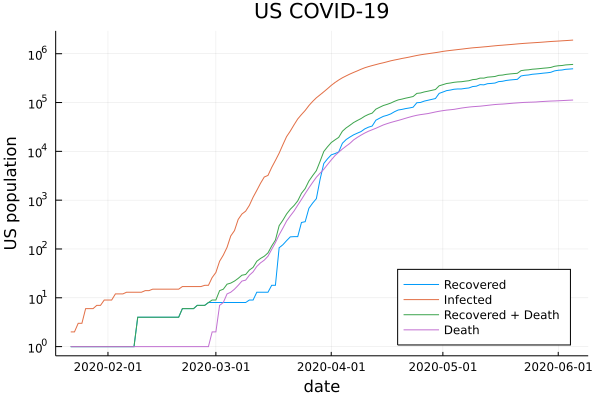

In [290]:
p = plot(title="$country COVID-19", ylabel = "US population", xlabel = "date")
plot!(dates, recovered_vec .+ 1, label = "Recovered")
plot!(dates, confirmed_vec .+ 1, label = "Infected")
plot!(dates, tot_recovered_vec .+ 1, label = "Recovered + Death")
plot!(dates, death_vec .+ 1, label ="Death",legend=:bottomright,yscale=:log10)
p

From the graph, the total number of cases in the number of confirmed cases grows exponentially, which implies that our model captures some general description of the pandemic, as the solution to the model results in an exponential form.

(We note that in the dataset, Infected refers to the total number cases recorded, not active cases. And in the graph, Infected + Death is the recovered compartment discussed in section 1.)

## Estimating the basic reproductive number

To solve for $R_0
$, we use the exact analytical solution of the evolution of the SIR model. (Harko, Lobo, and Mak 2014)

$$
u(t) = e^{\frac{-\beta}{N*\gamma}* R(t)} \;\;\; (eq.9)
$$
$$
S(t) = N * u(t) \;\;\; (eq.10)
$$
$$
I(t) = N + \frac{\gamma*N}{\beta}* ln(u(t)) - N * u(t) \;\;\; (eq.11)
$$
$$
R(t) = - \frac{\gamma*N}{\beta}* ln(u(t)) \;\;\; (eq.12)
$$
We solve equation 8 for I(t). 

$$
I(t) = N - R(t) - S(t) \;\;\; (eq.14)
$$
$$
I(t) = N - R(t) - N * e^{\frac{-\beta}{N*\gamma}* R(t)} \;\;\; (eq.15)
$$
$$
$$
We solve the model for parameters that minimises the least-squares using LMA. Because it does not guarantee to find the global minimum, we pick a few random initial parameters to increase the likelihood of falling into a global minimum. 

In [291]:
using LsqFit, StatsBase

# Set up (eq.15) with N = us_population: 
model(R, param) = population .- R - population .* exp.(-(param[1]/population).*R)

# Apply LMA:
params = []
active_infections_vec = confirmed_vec - recovered_vec
for i in 1:10
  pₒ = [10 .* rand()]
	global fit = curve_fit(model, recovered_vec, active_infections_vec, pₒ)
  push!(params, fit.param[1])
  end 
@show StatsBase.median(params)

#compute confidence interval at 0.05 confidence level:
@show confidence_intervals = confidence_interval(fit, 0.05);


StatsBase.median(params) = 4.8755148287716334
confidence_intervals = confidence_interval(fit, 0.05) = [(4.640616332012487, 5.1104133255051165)]


Using the analytical method, we cannot find the actual values of β and γ, but we can find the $R_0$, which in this case of COVID-19 in the U.S is estimated to be **4.88 (95% CI 4.64, 5.11)**, statistically significant. Early estimations of the reproductive number, using a hybrid deterministic–stochastic SEIR (susceptible-exposed-infectious-recovered) model, **sets its median value at 5.7 (95% CI 3.8–8.9**) (Sanche, Lin, Xu, Romero-Severson, Hengartner and Ke 2020). 

## Visualise the fitted model 

Due to its limitations, a deterministic SIR model weakly captures the details of the evolution of the pandemic. It should not be taken as an exact predicting tool for COVID-19, at least from our judgment (refer to section 4.). However, it still captures some general aspects of the model. For instance, it still captures the exponential growth characteristic of COVID-19 as seen in the plot below. 

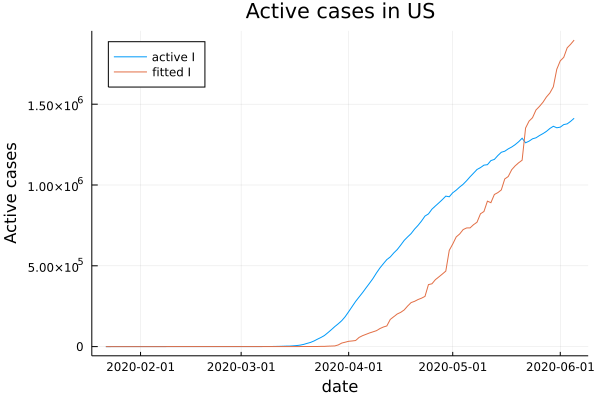

In [292]:
fitted_I = model(recovered_vec, [params[1]])
p = plot(title = "Active cases in $country", ylabel = "Active cases", xlabel = "date")
plot!(dates, active_infections_vec, label = "active I")
plot!(dates, fitted_I, label = "fitted I",legend=:topleft)

- Try to change the country, and also the time frame over which the model is fitted.
- How do European countries compare to South American ones for example? e.g. Ireland vs Brazil
- Why do you think the model captures some countries better than others?

# General thoughts on using this model

Mathematical modelling can be summarised with an aphorism commonly used in the mathematical biology community, **"All models are wrong, but some of them are useful"**. Using an informal definition, modelling is a process of creating a simple representation of complex systems that captures the general underlying truth about the system. The more complicated, the better the assumptions are, and the more the results are accurate. However, taking solid assumptions makes it hard, sometimes even impossible, to analyse. SIR model is built on assumptions (look at section 1) that are not a reasonable reflection of the real world. Beyond the assumptions, the model does not take into account changes in policies and measures put into effect to reduce the spread of COVID-19 and will not self-correct when given incomplete data (as is the case due to poor testing ability in the early days of the pandemic). This excludes the use of such simplistic models to realiably compute or predict specific parameters such as death rate, infection rate, and the number of infectious people. However, such a model can still be useful in approximately estimating parameters such as the basic reproductive number. 

Some of the issues mentioned of SIR are addressed by **using more complex models (stochastic derivations of SIR model, spatial models, or Bayesian tree model) and performing different tests(anti-body testing) to gauge the correct number of infections**.  


# **References**

1. Harko, Tiberiu,  Lobo, Francisco S.N., and Mak, M.K. (2014)“Exact Analytical Solutions of the Susceptible-Infected-Recovered (SIR) Epidemic Model and of the SIR Model with Equal Death and Birth Rates.” Applied Mathematics and Computation 236: 184–194. Crossref. Web.
2. Gavin, Henri P.(2013) “The Levenberg-Marquardt method for nonlinear least-squares curve-fitting problems”.
3. Kermack, W. O.,  McKendrick, A. G (1927). "A Contribution to the Mathematical Theory of Epidemics". *Proceedings of the Royal Society A*. **115** (772): 700–721. 
4. Sanche S, Lin YT, Xu C, Romero-Severson E, Hengartner N, Ke R.(2020) High contagiousness and rapid spread of severe acute respiratory syndrome coronavirus 2. Emerg Infect Dis. <https://doi.org/10.3201/eid2607.200282>